In [1]:
##displays all outputs of each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##read in files
nhl_team_stats2023 = pd.read_csv('NHLTeamStats2023-24.csv')
nhl_team_stats2022 = pd.read_csv('NHLTeamStats2022-23.csv')
nhl_team_stats2021 = pd.read_csv('NHLTeamStats2021-22.csv')

##adding season
nhl_team_stats2021['Season'] = '2021-22'
nhl_team_stats2022['Season'] = '2022-23'
nhl_team_stats2023['Season'] = '2023-24'

In [4]:
##combining and formating data frame
nhl_team_stats = pd.concat([nhl_team_stats2021, nhl_team_stats2022, nhl_team_stats2023])
nhl_team_stats = nhl_team_stats.drop(columns = ['Rk'])
nhl_team_stats = nhl_team_stats.rename(columns = {'Unnamed: 1' : 'Team'})
nhl_team_stats = nhl_team_stats.reset_index(drop = True)

##adding win percentage
nhl_team_stats['Win_Percentage'] = nhl_team_stats.W / nhl_team_stats.GP
nhl_team_stats['GD'] = nhl_team_stats.GF - nhl_team_stats.GA
nhl_team_stats

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Season,Win_Percentage,GD
0,Florida Panthers*,27.8,82,58,18,6,122,0.744,337,242,...,10.1,10.8,3062,11.0,2515,0.904,5,2021-22,0.707317,95
1,Colorado Avalanche*,28.2,82,56,19,7,119,0.726,308,232,...,9.0,10.4,2874,10.7,2625,0.912,7,2021-22,0.682927,76
2,Carolina Hurricanes*,28.3,82,54,20,8,116,0.707,277,200,...,9.2,7.7,2798,9.9,2310,0.913,6,2021-22,0.658537,77
3,Toronto Maple Leafs*,28.4,82,54,21,7,115,0.701,312,252,...,8.6,8.5,2835,11.0,2511,0.900,7,2021-22,0.658537,60
4,Minnesota Wild*,29.4,82,53,22,7,113,0.689,305,249,...,10.8,10.8,2666,11.4,2577,0.903,3,2021-22,0.646341,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Montreal Canadiens,26.7,82,30,36,16,76,0.463,232,281,...,10.2,10.0,2269,10.2,2738,0.897,2,2023-24,0.365854,-49
92,Columbus Blue Jackets,26.8,82,27,43,12,66,0.402,234,298,...,8.2,7.6,2458,9.5,2822,0.894,1,2023-24,0.329268,-64
93,Anaheim Ducks,27.7,82,27,50,5,59,0.360,203,293,...,13.5,10.9,2194,9.3,2666,0.890,1,2023-24,0.329268,-90
94,Chicago Blackhawks,27.4,82,23,53,6,52,0.317,178,289,...,8.7,9.3,2153,8.3,2681,0.892,1,2023-24,0.280488,-111


In [6]:
##data frame with win percentage and possible factors
win_factors = nhl_team_stats[['Win_Percentage', 'GF', 'GD', 'S', 'SV%']]
win_factors

,Win_Percentage,GF,GD,S,SV%
0,0.707317,337,95,3062,0.904
1,0.682927,308,76,2874,0.912
2,0.658537,277,77,2798,0.913
3,0.658537,312,60,2835,0.900
4,0.646341,305,56,2666,0.903
...,...,...,...,...,...
91,0.365854,232,-49,2269,0.897
92,0.329268,234,-64,2458,0.894
93,0.329268,203,-90,2194,0.890
94,0.280488,178,-111,2153,0.892


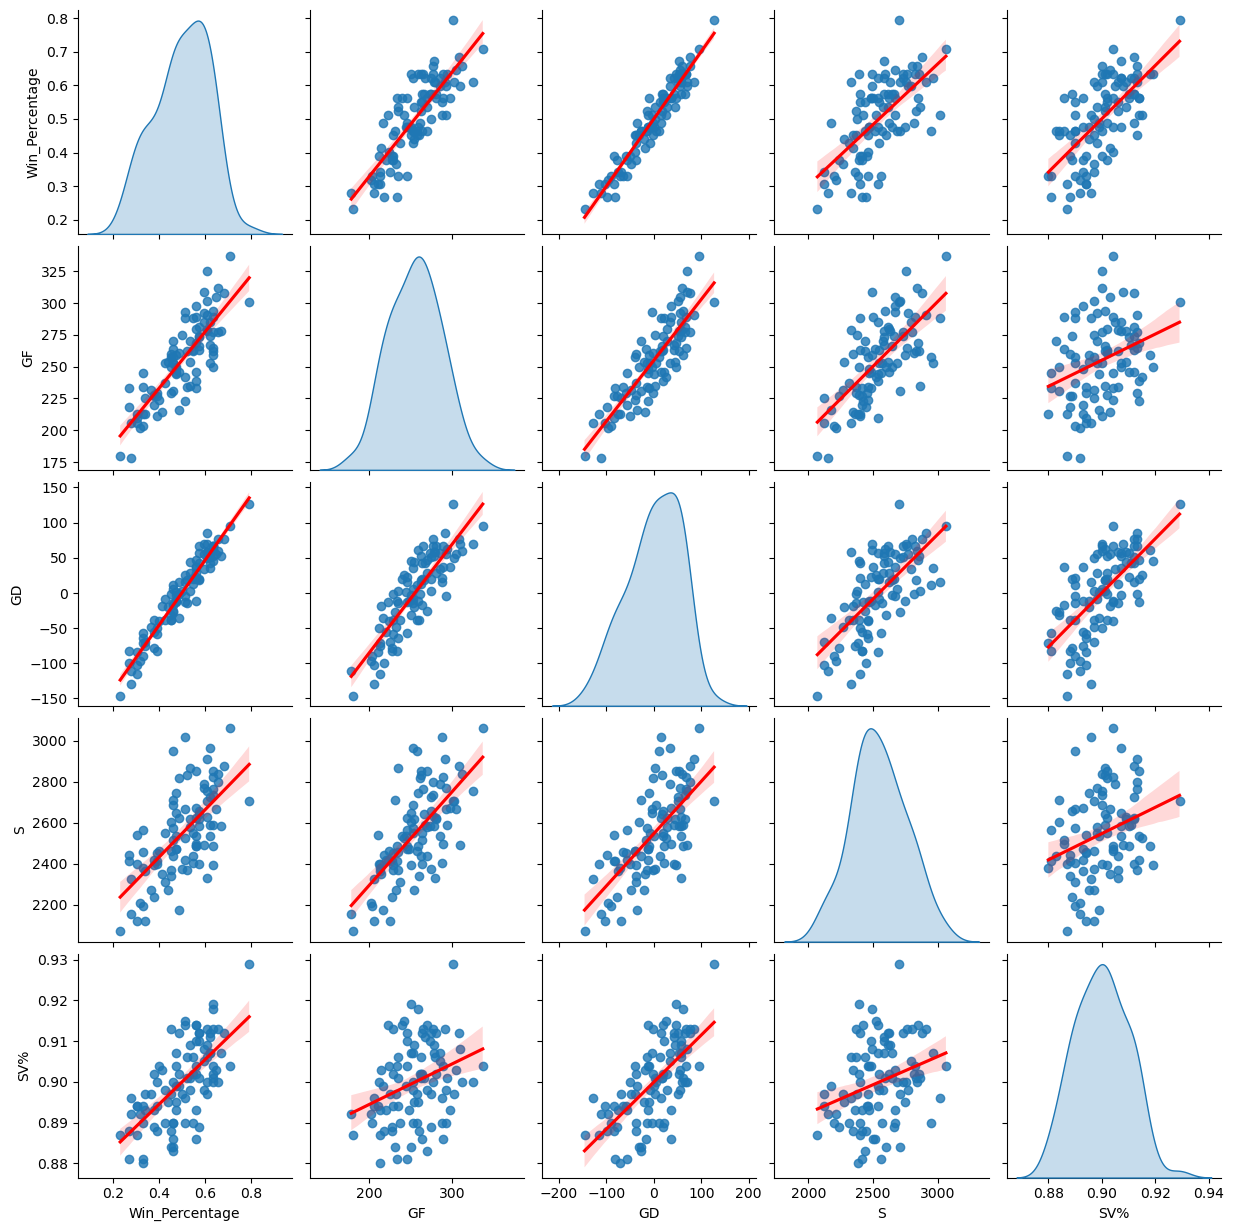

In [22]:
##scatter plot matrix using seaborn, diag_kind sets the type of graph in the diagonal kde is density
scatter_matrix = sns.pairplot(win_factors, diag_kind = 'kde', kind = 'reg', plot_kws = {'line_kws' : {'color' : 'red'}})

In [20]:
scatter_matrix.savefig('Assignment6matrixplot.pdf')

<Axes: xlabel='GD', ylabel='Win_Percentage'>

Text(0.5, 1.0, 'Goal Diff v Win Percentage')

Text(0, 0.5, 'Win Percentage')

Text(0.5, 0, 'Goal Differential')

<Axes: xlabel='GD', ylabel='Count'>

Text(0.5, 1.0, 'Histogram Goal Diff')

Text(0.5, 0, 'Goal Differential')

<Figure size 640x480 with 0 Axes>

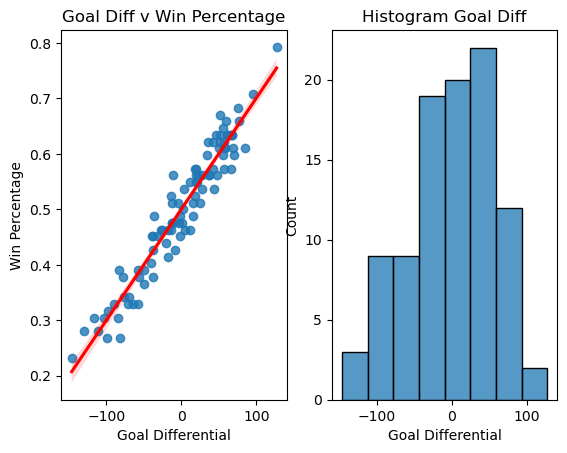

In [23]:
##it appears goal differential is the best fit for win percentage, slightly better than goals for
fig = plt.figure()
fig, axes = plt.subplots(1, 2)

##scatter plot using seaborn. includes ax as which subplot is being mapped to
sns.regplot(ax = axes[0], data = win_factors, x = 'GD', y = 'Win_Percentage', line_kws = {'color' : 'red'})
axes[0].set_title('Goal Diff v Win Percentage')
axes[0].set_ylabel('Win Percentage')
axes[0].set_xlabel('Goal Differential')

#histogram ax maps which subplot
sns.histplot(ax = axes[1], data = win_factors, x = 'GD')
axes[1].set_title('Histogram Goal Diff')
axes[1].set_xlabel('Goal Differential')

In [24]:
fig.savefig('Assignment6sidebyside.pdf')